In [2]:
# Day 1: DeepFashion Dataset Exploration
# Wardrobe AI Project - Real Fashion Images!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from pathlib import Path
from datetime import datetime
from collections import Counter

print("Libraries imported successfully!")
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print(f"Working directory: {os.getcwd()}")


Libraries imported successfully!
Date: 2025-11-26 10:29
Working directory: C:\Users\prach\OneDrive\Documents\Desktop\wardrobe-ai-android\ml-training\notebooks


In [3]:
# Define paths to DeepFashion dataset

BASE_PATH = Path("../../ml-training/datasets/deepfashion")
IMG_PATH = BASE_PATH / "Img" / "img"
ANNO_PATH = BASE_PATH / "Anno"
EVAL_PATH = BASE_PATH / "Eval"

print("=" * 60)
print("CHECKING DEEPFASHION DATASET PATHS:")
print("=" * 60)

# Check if folders exist
paths_to_check = {
    "Images folder": IMG_PATH,
    "Annotations folder": ANNO_PATH,
    "Evaluation folder": EVAL_PATH
}

all_exist = True
for name, path in paths_to_check.items():
    exists = path.exists()
    status = "✅ Found" if exists else "❌ Not found"
    print(f"{status} - {name}: {path}")
    if not exists:
        all_exist = False

if all_exist:
    print("\n🎉 All dataset folders are ready!")
else:
    print("\n⚠️ Some folders are missing. Make sure extraction is complete.")
    print("   You can continue with exploration once extraction finishes.")
    print("\n💡 TIP: Run this cell again after extraction completes!")

CHECKING DEEPFASHION DATASET PATHS:
✅ Found - Images folder: ..\..\ml-training\datasets\deepfashion\Img\img
✅ Found - Annotations folder: ..\..\ml-training\datasets\deepfashion\Anno
✅ Found - Evaluation folder: ..\..\ml-training\datasets\deepfashion\Eval

🎉 All dataset folders are ready!


In [4]:
print("=" * 60)
print("EXPLORING CLOTHING CATEGORIES:")
print("=" * 60)

# List all category folders
if IMG_PATH.exists():
    categories = sorted([d.name for d in IMG_PATH.iterdir() if d.is_dir()])
    
    if categories:
        print(f"\n📂 Found {len(categories)} clothing categories:\n")
        
        for i, category in enumerate(categories, 1):
            # Count images in each category
            category_path = IMG_PATH / category
            try:
                image_files = list(category_path.glob("*.jpg"))
                num_images = len(image_files)
                print(f"{i:2d}. {category:30s} - {num_images:,} images")
            except Exception as e:
                print(f"{i:2d}. {category:30s} - (counting...)")
        
        print(f"\n✅ Total categories: {len(categories)}")
    else:
        print("⏳ Image extraction still in progress...")
        print("   Category folders will appear as img.zip extracts.")
else:
    print("⚠️ Image folder not found yet.")
    print("   Waiting for img.zip extraction to complete...")

EXPLORING CLOTHING CATEGORIES:

📂 Found 5126 clothing categories:

 1. 1981_Graphic_Ringer_Tee        - 46 images
 2. 2-in-1_Space_Dye_Athletic_Tank - 63 images
 3. 25_Mesh-Paneled_Jersey_Dress   - 45 images
 4. 36_Plaid_Shirt_Dress           - 44 images
 5. ACDC_Graphic_Tee               - 65 images
 6. ASPCA_Happy_Face_Hoodie        - 49 images
 7. ASPCA_Urban_Myth_Tee           - 30 images
 8. Above_Average_Linen_Tee        - 43 images
 9. Abstract-Embroidered_Glitter_Shorts - 36 images
10. Abstract-Geo_Print_Mini_Skirt  - 49 images
11. Abstract-Paneled_Running_Shorts - 15 images
12. Abstract-Patterned_Blouse      - 108 images
13. Abstract-Plaid_Ruffled_Bell_Sleeve_Top - 44 images
14. Abstract-Printed_Capri_Leggings - 31 images
15. Abstract-Quilted_Drawstring_Hoodie - 46 images
16. Abstract-Stripe_Fuzzy_Sweater  - 33 images
17. Abstract-Striped_Ladder-Back_Dress - 43 images
18. Abstract-Trimmed_Knit_Tank     - 32 images
19. Abstract-Watercolor_Print_Blouse - 36 images
20. Abstract_A

In [5]:
# Quick count of images currently extracted
if IMG_PATH.exists():
    print("📊 Counting extracted images so far...")
    print("(This updates as extraction progresses)\n")
    
    try:
        # Count only .jpg files
        total_images = len(list(IMG_PATH.rglob("*.jpg")))
        
        if total_images > 0:
            print(f"✅ Images extracted so far: {total_images:,}")
            print(f"📈 Target: ~289,000 images")
            progress = (total_images / 289000) * 100
            print(f"📊 Progress: {progress:.1f}%")
            
            # Progress bar
            bar_length = 40
            filled = int(bar_length * progress / 100)
            bar = "█" * filled + "░" * (bar_length - filled)
            print(f"\n[{bar}] {progress:.1f}%")
        else:
            print("⏳ Extraction just started, no images counted yet...")
    except Exception as e:
        print(f"⏳ Counting in progress... (extraction ongoing)")
else:
    print("⚠️ Image folder not created yet.")
    print("   Start img.zip extraction first!")

📊 Counting extracted images so far...
(This updates as extraction progresses)

✅ Images extracted so far: 262,191
📈 Target: ~289,000 images
📊 Progress: 90.7%

[████████████████████████████████████░░░░] 90.7%


🎨 Loading sample images from categories...

✅ Sample images saved to: ../../docs/day1_deepfashion_samples.png


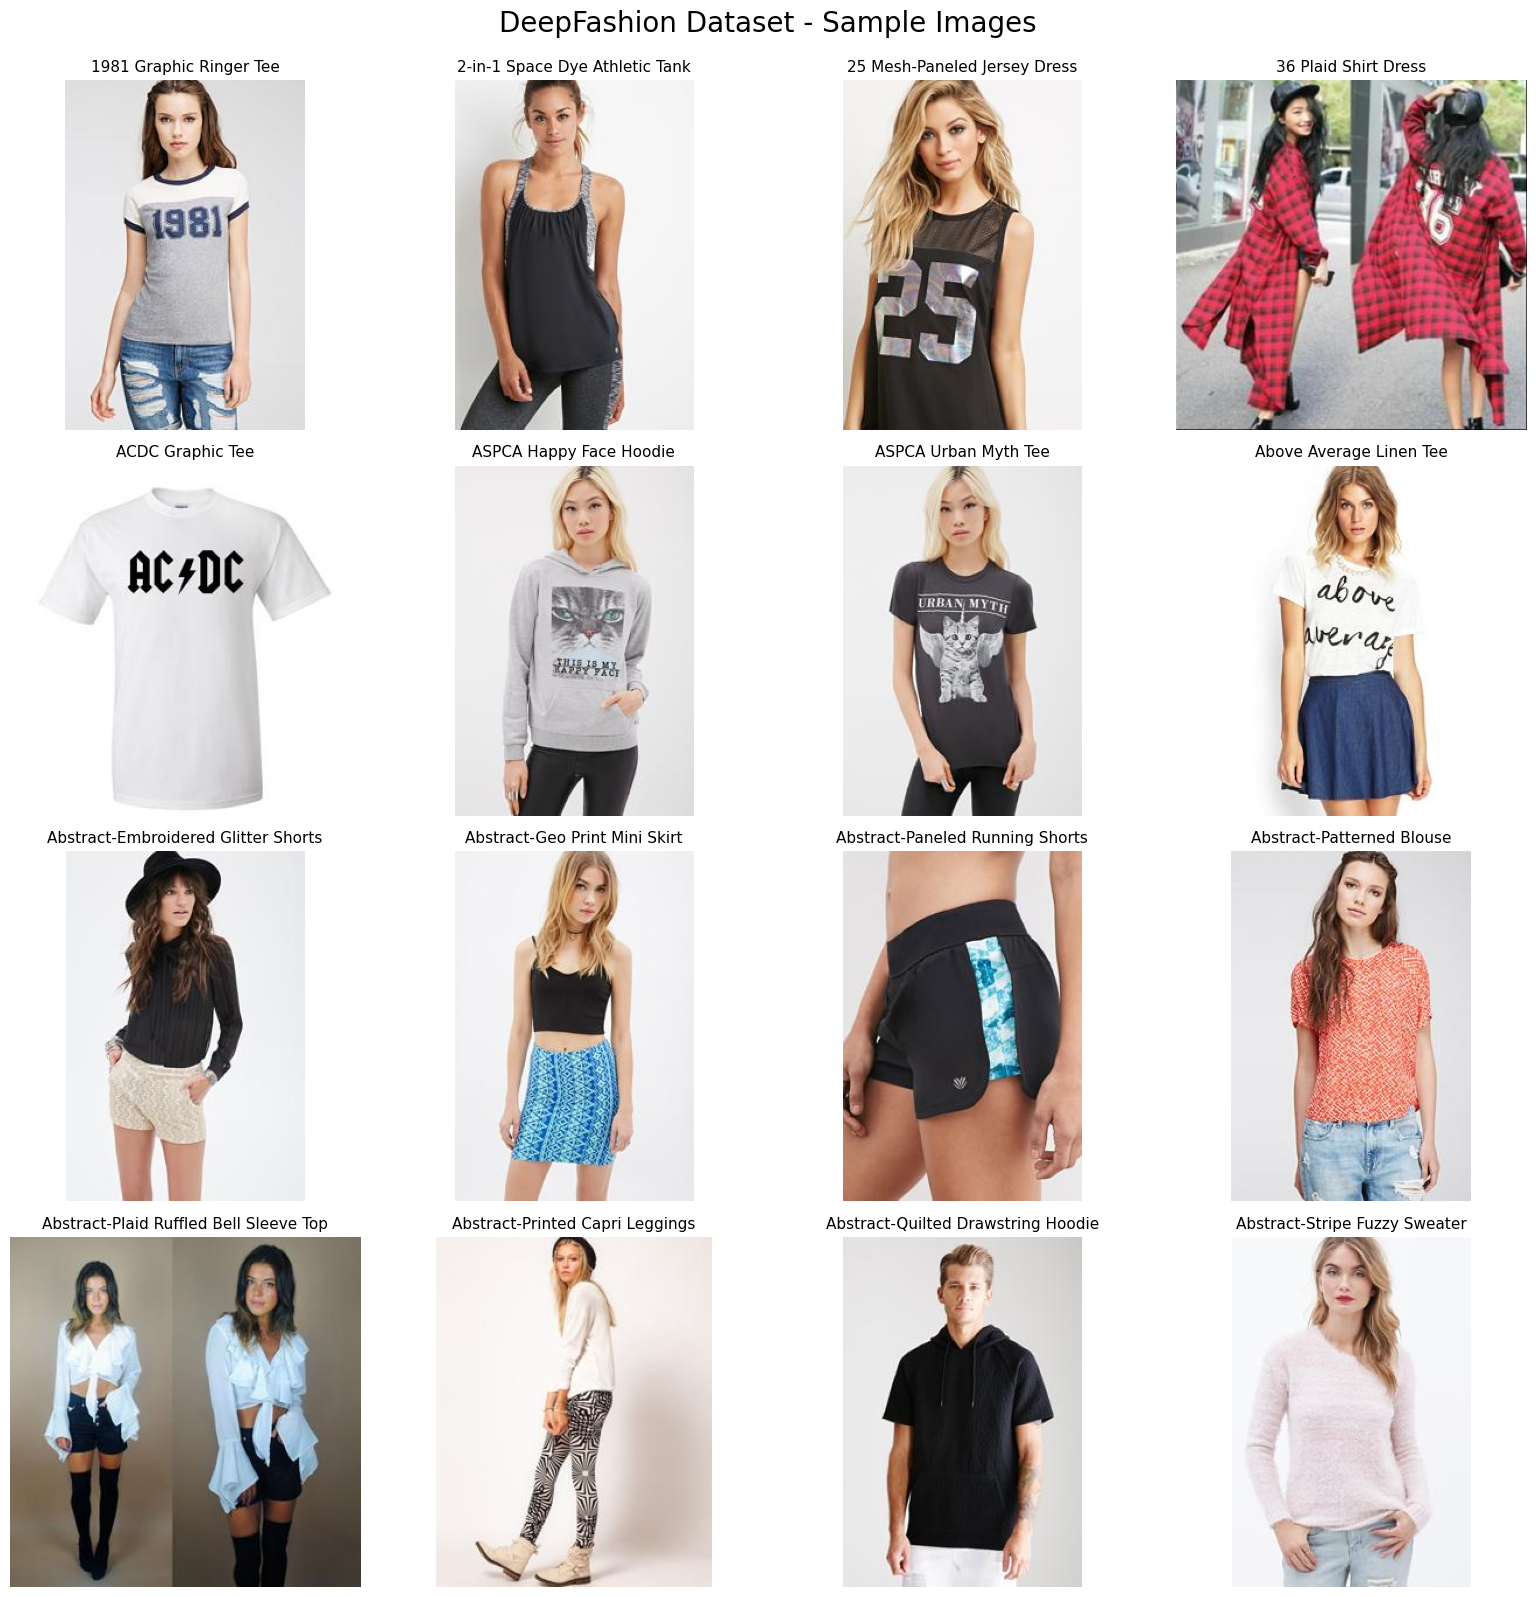

In [6]:
# Display sample images from each category
if IMG_PATH.exists():
    categories = sorted([d.name for d in IMG_PATH.iterdir() if d.is_dir()])
    
    if categories and len(categories) > 0:
        print("🎨 Loading sample images from categories...\n")
        
        # Determine grid size based on available categories
        num_display = min(16, len(categories))
        rows = (num_display + 3) // 4
        cols = min(4, num_display)
        
        fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
        fig.suptitle('DeepFashion Dataset - Sample Images', fontsize=20, y=0.995)
        
        if num_display == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        # Show one image from each category
        for idx, category in enumerate(categories[:num_display]):
            category_path = IMG_PATH / category
            images = list(category_path.glob("*.jpg"))
            
            if images:
                # Load first image
                try:
                    img_path = images[0]
                    img = Image.open(img_path)
                    
                    # Display
                    axes[idx].imshow(img)
                    axes[idx].set_title(category.replace('_', ' '), fontsize=11)
                    axes[idx].axis('off')
                except Exception as e:
                    axes[idx].text(0.5, 0.5, 'Loading...', 
                                 ha='center', va='center')
                    axes[idx].axis('off')
            else:
                axes[idx].text(0.5, 0.5, 'No images yet', 
                             ha='center', va='center')
                axes[idx].axis('off')
        
        # Hide unused subplots
        for idx in range(num_display, len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        
        # Save figure
        save_path = '../../docs/day1_deepfashion_samples.png'
        os.makedirs('../../docs', exist_ok=True)
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"✅ Sample images saved to: {save_path}")
        
        plt.show()
    else:
        print("⏳ No categories found yet. Extraction in progress...")
        print("   Re-run this cell once extraction shows progress!")
else:
    print("⚠️ Image folder not found. Start extraction first!")

In [7]:
# Check annotation files
print("=" * 60)
print("CHECKING ANNOTATION FILES:")
print("=" * 60)

if ANNO_PATH.exists():
    anno_files = sorted([f.name for f in ANNO_PATH.iterdir() if f.is_file()])
    
    if anno_files:
        print(f"\n✅ Found {len(anno_files)} annotation files:\n")
        for i, filename in enumerate(anno_files, 1):
            file_path = ANNO_PATH / filename
            file_size = file_path.stat().st_size / 1024  # KB
            print(f"{i:2d}. {filename:40s} ({file_size:.1f} KB)")
    else:
        print("⏳ Annotation files extracting...")
else:
    print("⚠️ Annotation folder not found yet.")
    print("   Extract Anno*.zip files!")

CHECKING ANNOTATION FILES:

✅ Found 21 annotation files:

 1. list_attr_cloth.txt                      (0.6 KB)
 2. list_attr_img.txt                        (2499.1 KB)
 3. list_bbox.txt                            (24572.6 KB)
 4. list_category_cloth.txt                  (0.9 KB)
 5. list_category_img.txt                    (20854.7 KB)
 6. list_landmarks.txt                       (40503.7 KB)
 7. test.txt                                 (179.4 KB)
 8. test_attr.txt                            (207.0 KB)
 9. test_bbox.txt                            (66.4 KB)
10. test_cate.txt                            (11.1 KB)
11. test_landmarks.txt                       (211.1 KB)
12. train.txt                                (627.8 KB)
13. train_attr.txt                           (724.6 KB)
14. train_bbox.txt                           (232.4 KB)
15. train_cate.txt                           (38.9 KB)
16. train_landmarks.txt                      (741.0 KB)
17. val.txt                                  (

In [8]:
# Check evaluation files
print("=" * 60)
print("CHECKING EVALUATION FILES:")
print("=" * 60)

if EVAL_PATH.exists():
    eval_files = sorted([f.name for f in EVAL_PATH.iterdir() if f.is_file()])
    
    if eval_files:
        print(f"\n✅ Found {len(eval_files)} evaluation files:\n")
        for i, filename in enumerate(eval_files, 1):
            file_path = EVAL_PATH / filename
            file_size = file_path.stat().st_size / 1024  # KB
            print(f"{i:2d}. {filename:40s} ({file_size:.1f} KB)")
        
        # Peek at partition file if exists
        partition_file = EVAL_PATH / "list_eval_partition.txt"
        if partition_file.exists():
            print("\n📋 Sample from list_eval_partition.txt:")
            with open(partition_file, 'r') as f:
                for i, line in enumerate(f):
                    if i < 5:
                        print(f"   {line.strip()}")
                    else:
                        break
    else:
        print("⏳ Evaluation files extracting...")
else:
    print("⚠️ Evaluation folder not found yet.")
    print("   Extract Eval*.zip files!")

CHECKING EVALUATION FILES:

✅ Found 1 evaluation files:

 1. list_eval_partition.txt                  (21631.0 KB)

📋 Sample from list_eval_partition.txt:
   289222
   image_name  evaluation_status
   img/Sheer_Pleated-Front_Blouse/img_00000001.jpg                        train
   img/Sheer_Pleated-Front_Blouse/img_00000002.jpg                        train
   img/Sheer_Pleated-Front_Blouse/img_00000003.jpg                        val


In [9]:
# Create comprehensive status report
from datetime import datetime

print("=" * 60)
print("📊 DEEPFASHION DATASET STATUS REPORT")
print("=" * 60)
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print()

# Check each component
status = {
    "Images (Img/)": IMG_PATH.exists(),
    "Annotations (Anno/)": ANNO_PATH.exists(),
    "Evaluation (Eval/)": EVAL_PATH.exists()
}

for component, exists in status.items():
    icon = "✅" if exists else "❌"
    print(f"{icon} {component}")

print()

# Detailed counts
if IMG_PATH.exists():
    categories = [d for d in IMG_PATH.iterdir() if d.is_dir()]
    print(f"📂 Categories found: {len(categories)}")
    
    try:
        total_imgs = len(list(IMG_PATH.rglob("*.jpg")))
        print(f"📸 Images extracted: {total_imgs:,}")
    except:
        print(f"📸 Images extracted: Counting...")

if ANNO_PATH.exists():
    anno_count = len([f for f in ANNO_PATH.iterdir() if f.is_file()])
    print(f"📝 Annotation files: {anno_count}")

if EVAL_PATH.exists():
    eval_count = len([f for f in EVAL_PATH.iterdir() if f.is_file()])
    print(f"📋 Evaluation files: {eval_count}")

print()
print("=" * 60)

# Overall status
all_ready = all(status.values())
if all_ready:
    print("🎉 DATASET READY FOR EXPLORATION!")
    print("   Run all cells above to see your fashion data!")
else:
    print("⏳ EXTRACTION IN PROGRESS...")
    print("   Re-run cells as extraction completes!")
print("=" * 60)

📊 DEEPFASHION DATASET STATUS REPORT
Date: 2025-11-26 10:29

✅ Images (Img/)
✅ Annotations (Anno/)
✅ Evaluation (Eval/)

📂 Categories found: 5126
📸 Images extracted: 262,191
📝 Annotation files: 21
📋 Evaluation files: 1

🎉 DATASET READY FOR EXPLORATION!
   Run all cells above to see your fashion data!
